# Section 1-Funnel Analysis

# 1. Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:\Time-series-forecasting\AssignmentData.csv')
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.8,7080,59,0.940725424
1,01-01-2015,Q1,Finishing,0.75,960,8,0.8865
2,01-01-2015,Q1,Sewing,0.8,3660,30.5,0.800570492
3,01-01-2015,Q1,Sewing,0.8,3660,30.5,0.800570492
4,01-01-2015,Q1,Sewing,0.8,1920,56,NaN
...,...,...,...,...,...,...,...
1192,03-11-2015,Q2,Finishing,0.75,960,8,0.628333333
1193,03-11-2015,Q2,Finishing,0.7,960,8,NaN
1194,03-11-2015,Q2,Finishing,0.65,960,8,0.625625
1195,03-11-2015,Q2,Finishing,0.75,1800,15,0.505888889


In [3]:
df.shape

(1197, 7)

In [4]:
df.describe

<bound method NDFrame.describe of             Date Quarter Department Targeted Productivity Overtime  \
0     01-01-2015      Q1     Sewing                   0.8     7080   
1     01-01-2015      Q1  Finishing                  0.75      960   
2     01-01-2015      Q1     Sewing                   0.8     3660   
3     01-01-2015      Q1     Sewing                   0.8     3660   
4     01-01-2015      Q1     Sewing                   0.8     1920   
...          ...     ...        ...                   ...      ...   
1192  03-11-2015      Q2  Finishing                  0.75      960   
1193  03-11-2015      Q2  Finishing                   0.7      960   
1194  03-11-2015      Q2  Finishing                  0.65      960   
1195  03-11-2015      Q2  Finishing                  0.75     1800   
1196  03-11-2015      Q2  Finishing                   0.7      720   

     No. of Workers Actual Productivity  
0                59         0.940725424  
1                 8              0.8865  

**Nan values are only in Actual Productivity column but we will not drop those nan vakues as Actual productivity is our crucial feature**

In [5]:
df.isnull().sum()

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


**Firstly replace non-numeric values in numeric columns with nan and then replace all nan values with mean of the respective columns**

In [7]:
import numpy as np

numeric_columns = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']


for col in numeric_columns:
    
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    mean_value = df[col].mean()
    
    df[col] = df[col].fillna(mean_value)

print(df.head())


         Date Quarter Department  Targeted Productivity  Overtime  \
0  01-01-2015      Q1     Sewing                   0.80    7080.0   
1  01-01-2015      Q1  Finishing                   0.75     960.0   
2  01-01-2015      Q1     Sewing                   0.80    3660.0   
3  01-01-2015      Q1     Sewing                   0.80    3660.0   
4  01-01-2015      Q1     Sewing                   0.80    1920.0   

   No. of Workers  Actual Productivity  
0            59.0             0.940725  
1             8.0             0.886500  
2            30.5             0.800570  
3            30.5             0.800570  
4            56.0             0.734882  


In [8]:
df.head(70)

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.800000,7080.0,59.0,0.940725
1,01-01-2015,Q1,Finishing,0.750000,960.0,8.0,0.886500
2,01-01-2015,Q1,Sewing,0.800000,3660.0,30.5,0.800570
3,01-01-2015,Q1,Sewing,0.800000,3660.0,30.5,0.800570
4,01-01-2015,Q1,Sewing,0.800000,1920.0,56.0,0.734882
...,...,...,...,...,...,...,...
65,01-05-2015,Q1,Sewing,0.800000,7080.0,59.0,0.850569
66,01-05-2015,Q1,Finishing,0.800000,1920.0,8.0,0.820833
67,01-05-2015,Q1,Finishing,0.729574,960.0,8.0,0.804417
68,01-05-2015,Q1,Sewing,0.800000,6780.0,56.5,0.800684


In [9]:
df.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

**Checking for duplicate rows**

In [10]:
df.duplicated().sum()

np.int64(35)

**Dropping the duplicate rows and keeping only unique rows**

In [11]:
import pandas as pd



def handle_duplicates(df):
    
    duplicate_rows = df[df.duplicated(keep='first')]
    
    if not duplicate_rows.empty:
        print(f"Duplicate rows detected:")
        print(duplicate_rows)
    
    df = df.drop_duplicates(keep='first')
    
    
    num_duplicates = df.shape[0] - df.shape[0]
    print(f"Number of duplicate rows removed: {num_duplicates}")

    return df


df = handle_duplicates(df)

Duplicate rows detected:
            Date Quarter Department  Targeted Productivity  Overtime  \
3     01-01-2015      Q1     Sewing                   0.80    3660.0   
27    01-03-2015      Q1     Sewing                   0.80    7080.0   
31    01-03-2015      Q1     Sewing                   0.80    6720.0   
69    01-05-2015      Q1     Sewing                   0.80    6780.0   
73    01-05-2015      Q1     Sewing                   0.80    7200.0   
75    01-05-2015      Q1     Sewing                   0.80    6900.0   
89    01-06-2015      Q1     Sewing                   0.80   10620.0   
93    01-06-2015      Q1     Sewing                   0.80   10350.0   
97    01-06-2015      Q1     Sewing                   0.80   10170.0   
107   01-07-2015      Q1     Sewing                   0.80   10620.0   
115   01-07-2015      Q1     Sewing                   0.80   10350.0   
133   01-08-2015      Q2     Sewing                   0.80   10170.0   
154   01-10-2015      Q2     Sewing    

In [12]:
df.duplicated().sum()

np.int64(0)

**Our dataset after preprocessing**

In [13]:
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,01-01-2015,Q1,Finishing,0.75,960.0,8.0,0.886500
2,01-01-2015,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,01-01-2015,Q1,Sewing,0.80,1920.0,56.0,0.734882
5,01-01-2015,Q1,Sewing,0.80,6720.0,56.0,0.800125
...,...,...,...,...,...,...,...
1192,03-11-2015,Q2,Finishing,0.75,960.0,8.0,0.628333
1193,03-11-2015,Q2,Finishing,0.70,960.0,8.0,0.734882
1194,03-11-2015,Q2,Finishing,0.65,960.0,8.0,0.625625
1195,03-11-2015,Q2,Finishing,0.75,1800.0,15.0,0.505889


**For the Actual Productivity column, which contains missing values, we impute these missing values by replacing them with the mean of the column. This method assumes that the missing data generally follows the trend of the column's distribution, allowing us to retain the integrity of the dataset without losing valuable information.**

**For columns such as Targeted Productivity, Overtime, and No. of Workers, which contain non-numeric values, we convert any invalid entries to NaN and subsequently replace these non-numeric values with the mean of the respective column. This ensures that these columns are kept numeric and consistent for analysis. If the non-numeric values are scattered randomly and do not align with the general data trend, we consider dropping the affected rows.**

**Additionally, any duplicate rows in the dataset are identified and removed, keeping only the first occurrence, to avoid repetition of information and ensure that the data remains clean and reliable for further analysis.**

In [14]:
df.shape

(1162, 7)

# 2. Principal Component Analysis (PCA)

# 2 (i)

In [15]:

from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for PCA
columns = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']


scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[columns])


df_standardized = pd.DataFrame(df_standardized, columns=columns)

print("Standardized Features:")
print(df_standardized.head())


Standardized Features:
   Targeted Productivity  Overtime  No. of Workers  Actual Productivity
0               0.731126  0.784034        1.111187             1.200705
1               0.221184 -1.069235       -1.188457             0.887189
2               0.731126 -0.251616       -0.173908             0.390369
3               0.731126 -0.778526        0.975914             0.010575
4               0.731126  0.675018        0.975914             0.387793


In [16]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(df_standardized)


explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio of each Principal Component:")
print(explained_variance_ratio)


Explained Variance Ratio of each Principal Component:
[0.4500876  0.33462546 0.14880413 0.06648281]


In [17]:
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,01-01-2015,Q1,Finishing,0.75,960.0,8.0,0.886500
2,01-01-2015,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,01-01-2015,Q1,Sewing,0.80,1920.0,56.0,0.734882
5,01-01-2015,Q1,Sewing,0.80,6720.0,56.0,0.800125
...,...,...,...,...,...,...,...
1192,03-11-2015,Q2,Finishing,0.75,960.0,8.0,0.628333
1193,03-11-2015,Q2,Finishing,0.70,960.0,8.0,0.734882
1194,03-11-2015,Q2,Finishing,0.65,960.0,8.0,0.625625
1195,03-11-2015,Q2,Finishing,0.75,1800.0,15.0,0.505889


# 2 (ii)

In [18]:
import numpy as np


cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 90% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.9) + 1

print(f"Number of Principal Components that explain at least 90% of the variance: {num_components}")


Number of Principal Components that explain at least 90% of the variance: 3


# 2 (iii)

In [19]:

num_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of Principal Components explaining at least 90% of the variance: {num_components}")


feature_names = df_standardized.columns
principal_components = pca.components_

print("\nFeature Contributions to Principal Components:")
for i in range(num_components):
    print(f"\nPrincipal Component {i + 1}:")
    for feature, contribution in zip(feature_names, principal_components[i]):
        print(f"{feature}: {contribution:.4f}")


Number of Principal Components explaining at least 90% of the variance: 3

Feature Contributions to Principal Components:

Principal Component 1:
Targeted Productivity: -0.2860
Overtime: 0.6561
No. of Workers: 0.6539
Actual Productivity: -0.2453

Principal Component 2:
Targeted Productivity: 0.6419
Overtime: 0.2619
No. of Workers: 0.2688
Actual Productivity: 0.6686

Principal Component 3:
Targeted Productivity: 0.7112
Overtime: 0.0110
No. of Workers: 0.0367
Actual Productivity: -0.7019


# Visualization

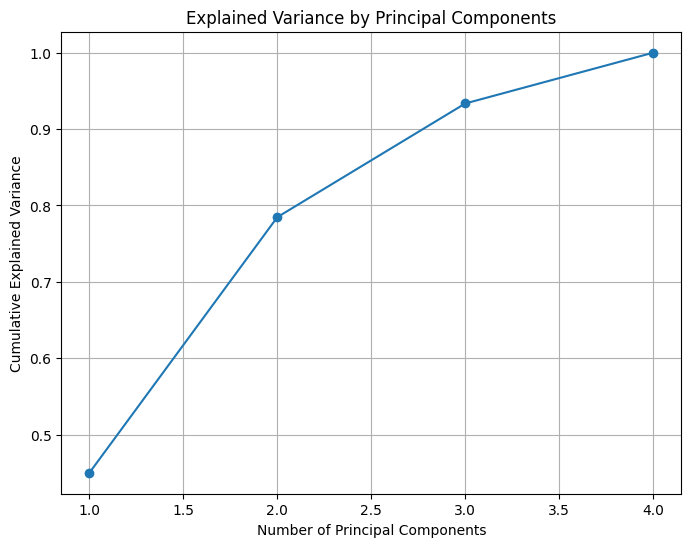

In [20]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [21]:
# Getting principal components
principal_components = pca.components_

# Displaying principal components
print("Principal Components:")
for i, component in enumerate(principal_components[:num_components]):
    print(f"Principal Component {i + 1}: {component}")

# Getting explained variance of the selected components
explained_variance = pca.explained_variance_ratio_[:num_components]
print("\nExplained Variance of Selected Principal Components:")
print(explained_variance)


Principal Components:
Principal Component 1: [-0.28599299  0.65607041  0.65390703 -0.24532676]
Principal Component 2: [0.6419447  0.26190333 0.26883483 0.66861161]
Principal Component 3: [ 0.71122657  0.01101897  0.03666726 -0.70191941]

Explained Variance of Selected Principal Components:
[0.4500876  0.33462546 0.14880413]


# 2 (iv)

**Performing PCA on the standardized features helps reduce the dataset's complexity while retaining the most significant information. The principal components generated through PCA explain a large portion of the variance, allowing us to simplify the data without losing essential details. By focusing on just a few components that capture 90% or more of the variance, we can gain a clearer understanding of productivity trends within the organization.**

**The loadings for each feature on the principal components provide insights into which factors are most influential in driving productivity. For instance, if Actual Productivity and Targeted Productivity contribute heavily to the first principal component (PC1), this component can be seen as a measure of overall productivity efficiency. Similarly, other components may highlight specific dynamics, such as the relationship between overtime and workforce size, helping to reveal secondary trends.**

**PCA can be applied practically by projecting data onto these principal components to monitor performance over time. Trends in productivity can be tracked through PC1, while other components may uncover underlying patterns, such as the impact of workforce size or overtime. Ultimately, this analysis can guide decision-making and performance monitoring by highlighting which factors to prioritize for optimizing productivity.**

**Insights gained from the analysis.**

**The Principal Component Analysis (PCA) on the standardized features of 'Targeted Productivity,' 'Overtime,' 'No. of Workers,' and 'Actual Productivity' yielded insightful results.**

**Explained Variance and Principal Components
The first three principal components explain more than 90% of the variance in the data. The breakdown is as follows:**

**PC1 (45.01% Variance): Heavily influenced by 'Overtime' and 'No. of Workers,' both with high positive contributions, suggesting these variables are closely related and largely drive the first component.**
**PC2 (33.46% Variance): Dominated by 'Targeted Productivity' and 'Actual Productivity,' showing the contrast between the target and actual productivity levels, which might highlight inefficiencies or deviations from set targets.**
**PC3 (14.88% Variance): Mostly explains 'Targeted Productivity' and 'Actual Productivity' again, indicating that differences between the two continue to contribute to smaller, nuanced variances.**
**Interpretation
These components can be used to understand productivity dynamics within the organization. PC1 suggests that workforce numbers and overtime have a significant correlation and jointly affect productivity, likely indicating resource management issues. PC2 and PC3 highlight the relationship between planned and actual productivity, indicating that improving alignment between targets and actual outcomes could significantly enhance organizational performance.**







**

# 3. Predictive Modeling and Time Series Analysis

In [22]:
df= df.drop(['Quarter', 'Department','Targeted Productivity','Overtime','No. of Workers'], axis=1)

In [23]:
df

,Date,Actual Productivity
0,01-01-2015,0.940725
1,01-01-2015,0.886500
2,01-01-2015,0.800570
4,01-01-2015,0.734882
5,01-01-2015,0.800125
...,...,...
1192,03-11-2015,0.628333
1193,03-11-2015,0.734882
1194,03-11-2015,0.625625
1195,03-11-2015,0.505889


**Fixing the date column to correct date-time format**

In [24]:
 df['Date'] = df['Date'].str.replace(r'-', '/', regex=True)

In [25]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Actual Productivity
0,2015-01-01,0.940725
1,2015-01-01,0.886500
2,2015-01-01,0.800570
4,2015-01-01,0.734882
5,2015-01-01,0.800125
...,...,...
1192,2015-03-11,0.628333
1193,2015-03-11,0.734882
1194,2015-03-11,0.625625
1195,2015-03-11,0.505889


In [26]:
df.head(226)

,Date,Actual Productivity
0,2015-01-01,0.940725
1,2015-01-01,0.886500
2,2015-01-01,0.800570
4,2015-01-01,0.734882
5,2015-01-01,0.800125
...,...,...
238,2015-01-14,0.934607
239,2015-01-14,0.908081
240,2015-01-14,0.900145
241,2015-01-14,0.891723


In [27]:
df.isnull().sum()

Date                   0
Actual Productivity    0
dtype: int64

In [28]:
df.shape

(1162, 2)

**Grouping and indexing dates ,calculating the mean of Actual productivity* for uniques dates**

In [29]:
df = df.groupby('Date').agg({'Actual Productivity': 'mean'}).reset_index()

In [30]:
df

,Date,Actual Productivity
0,2015-01-01,0.727110
1,2015-01-03,0.803042
2,2015-01-04,0.780174
3,2015-01-05,0.795347
4,2015-01-06,0.796732
5,2015-01-07,0.760279
6,2015-01-08,0.750789
7,2015-01-10,0.767551
8,2015-01-11,0.744449
9,2015-01-12,0.740866


In [31]:
df.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

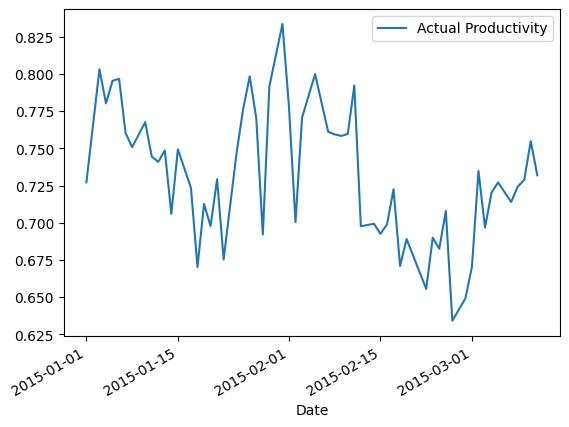

In [32]:
df.plot()

### Applying Dickey-Fuller test to check the stationarity of data

In [33]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [34]:
ad_test(df['Actual Productivity'])

1. ADF :  -2.520312970933356
2. P-Value :  0.11060985960572867
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


#### p value greater than 0.05 indicates that the data is non-stationary, so converting the data to stationary through differencing technique

In [35]:
df['Actual First Productivity']=df['Actual Productivity']-df['Actual Productivity'].shift(1)


In [36]:
df.head()

,Actual Productivity,Actual First Productivity
Date,,
2015-01-01,0.727110,NaN
2015-01-03,0.803042,0.075932
2015-01-04,0.780174,-0.022868
2015-01-05,0.795347,0.015173
2015-01-06,0.796732,0.001385


In [37]:
ad_test(df['Actual First Productivity'].dropna())


1. ADF :  -8.093389761581287
2. P-Value :  1.3592254793264487e-12
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

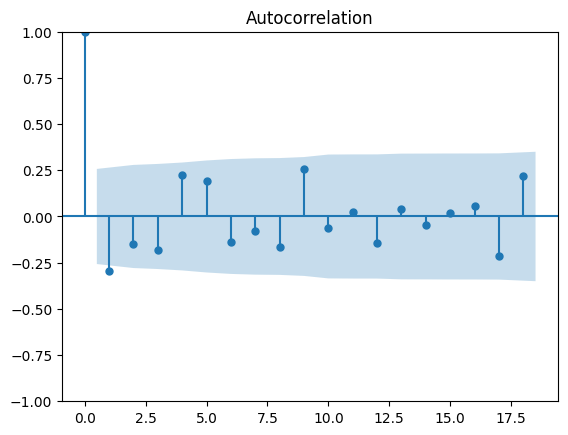

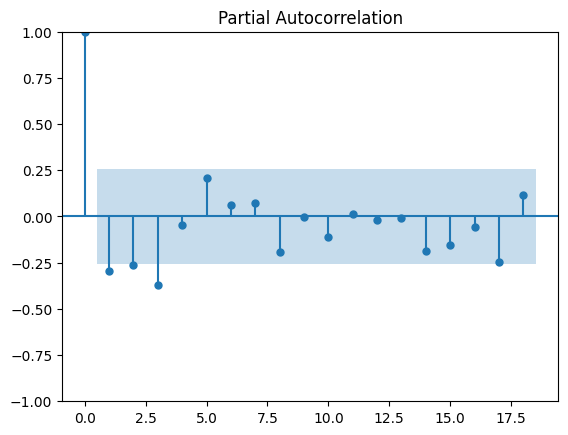

In [39]:
acf12 = plot_acf(df["Actual First Productivity"].dropna())
pacf12 = plot_pacf(df["Actual First Productivity"].dropna())

In [40]:
df=df.dropna()
df

,Actual Productivity,Actual First Productivity
Date,,
2015-01-03,0.803042,0.075932
2015-01-04,0.780174,-0.022868
2015-01-05,0.795347,0.015173
2015-01-06,0.796732,0.001385
2015-01-07,0.760279,-0.036453
2015-01-08,0.750789,-0.009490
2015-01-10,0.767551,0.016762
2015-01-11,0.744449,-0.023102
2015-01-12,0.740866,-0.003583


Arima Model

In [43]:
!pip install pmdarima


**Obtaining anad training hyperparameters**

In [48]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['Actual First Productivity'], trace=True,
suppress_warnings=True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-14]
test=df.iloc[-14:]
print(train.shape,test.shape)

(58, 2)
(44, 2) (14, 2)


### Training ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Actual Productivity'],order=(2,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Actual Productivity   No. Observations:                   44
Model:                  ARIMA(2, 0, 2)   Log Likelihood                  84.265
Date:                 Mon, 02 Sep 2024   AIC                           -156.530
Time:                         15:03:54   BIC                           -145.824
Sample:                              0   HQIC                          -152.560
                                  - 44                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7381      0.018     41.852      0.000       0.704       0.773
ar.L1          0.2022      0.377      0.536      0.592      -0.537       0.942
ar.L2          0.6020      0.232      2.590      0.010       0.146       1.058
ma.L1          0.2474      0.480      0.515      0.607      -0.694       1.189
ma.L2         -0.5437      0.220     -2.476      0.013      -0.974      -0.113
sigma2         0.0012      0.000      3.714      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.68   Prob(JB):                         0.65
Heteroskedasticity (H):               1.55   Skew:                             0.07
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2015-02-24    0.709519
2015-02-25    0.701079
2015-02-26    0.713415
2015-02-28    0.710828
2015-03-01    0.717732
2015-03-02    0.717571
2015-03-03    0.721694
2015-03-04    0.722431
2015-03-05    0.725063
2015-03-07    0.726038
2015-03-08    0.727820
2015-03-09    0.728768
2015-03-10    0.730032
2015-03-11    0.730859
Name: predicted_mean, dtype: float64


In [ ]:
pred

Date
2015-02-24    0.709519
2015-02-25    0.701079
2015-02-26    0.713415
2015-02-28    0.710828
2015-03-01    0.717732
2015-03-02    0.717571
2015-03-03    0.721694
2015-03-04    0.722431
2015-03-05    0.725063
2015-03-07    0.726038
2015-03-08    0.727820
2015-03-09    0.728768
2015-03-10    0.730032
2015-03-11    0.730859
Name: predicted_mean, dtype: float64

In [ ]:
test

,Actual Productivity,Actual First Productivity
Date,,
2015-02-24,0.682461,-0.007518
2015-02-25,0.707936,0.025475
2015-02-26,0.634143,-0.073793
2015-02-28,0.649101,0.014959
2015-03-01,0.670481,0.021379
2015-03-02,0.734732,0.064252
2015-03-03,0.696695,-0.038037
2015-03-04,0.720309,0.023614
2015-03-05,0.727060,0.006751


**(ii)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt


aligned_test = test['Actual Productivity'].align(pred, join='inner')[0]
aligned_pred = test['Actual Productivity'].align(pred, join='inner')[1]

# Calculate RMSE
rmse = sqrt(mean_squared_error(aligned_test, aligned_pred))
print(f"RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(aligned_test, aligned_pred)
print(f"MSE: {mse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(aligned_test, aligned_pred)
print(f"MAPE: {mape}")


RMSE: 0.03252197768115254
MSE: 0.0010576790322933836
MAPE: 0.032931416370825146


In [ ]:
pred.shape

(14,)

In [ ]:
model2=ARIMA(df['Actual Productivity'],order=(2,0,2))
model2=model2.fit()
df.tail()

,Actual Productivity,Actual First Productivity
Date,,
2015-03-07,0.713915,-0.013145
2015-03-08,0.724225,0.010310
2015-03-09,0.728803,0.004578
2015-03-10,0.754781,0.025978
2015-03-11,0.731894,-0.022888


**(i)**

**Forecasting the Actual Productivity for the next four quarters(4 weeks)**

In [ ]:
index_future_dates=pd.date_range(start='2015-03-11',end='2015-04-10')
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2015-03-11    0.733733
2015-03-12    0.735694
2015-03-13    0.735860
2015-03-14    0.736206
2015-03-15    0.736489
2015-03-16    0.736743
2015-03-17    0.736968
2015-03-18    0.737168
2015-03-19    0.737346
2015-03-20    0.737504
2015-03-21    0.737644
2015-03-22    0.737768
2015-03-23    0.737879
2015-03-24    0.737977
2015-03-25    0.738065
2015-03-26    0.738142
2015-03-27    0.738211
2015-03-28    0.738272
2015-03-29    0.738327
2015-03-30    0.738375
2015-03-31    0.738418
2015-04-01    0.738456
2015-04-02    0.738490
2015-04-03    0.738520
2015-04-04    0.738547
2015-04-05    0.738571
2015-04-06    0.738592
2015-04-07    0.738610
2015-04-08    0.738627
2015-04-09    0.738642
2015-04-10    0.738655
Freq: D, Name: ARIMA Predictions, dtype: float64


**Chart showing predicted productivity for next four quarters or 1 month i.e, from '2015-03-11'to '2015-04-10'**

<Axes: >

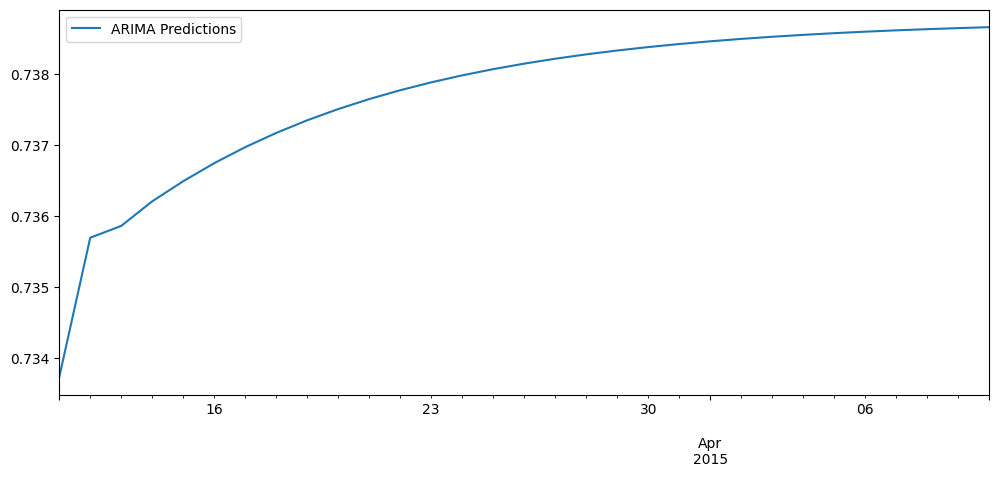

In [ ]:
pred.plot(figsize=(12,5),legend=True)

<Axes: xlabel='Date'>

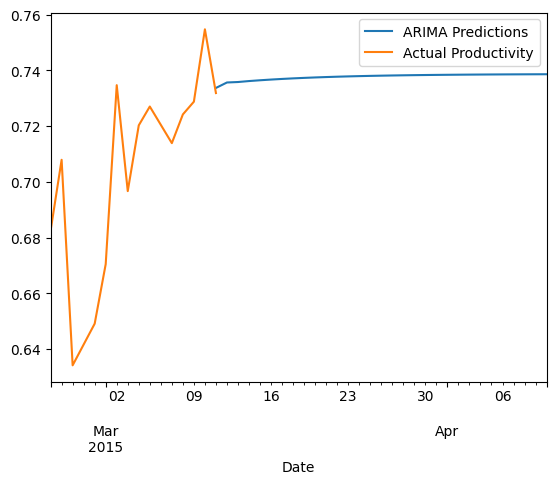

In [ ]:
pred.plot(legend=True)
test['Actual Productivity'].plot(legend=True)

In [ ]:
df

,Actual Productivity,Actual First Productivity
Date,,
2015-01-03,0.803042,0.075932
2015-01-04,0.780174,-0.022868
2015-01-05,0.795347,0.015173
2015-01-06,0.796732,0.001385
2015-01-07,0.760279,-0.036453
2015-01-08,0.750789,-0.009490
2015-01-10,0.767551,0.016762
2015-01-11,0.744449,-0.023102
2015-01-12,0.740866,-0.003583


# 4. Clustering Analysis

In [ ]:
df=pd.read_csv('D:\Time-series-forecasting\AssignmentData.csv')
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.8,7080,59,0.940725424
1,01-01-2015,Q1,Finishing,0.75,960,8,0.8865
2,01-01-2015,Q1,Sewing,0.8,3660,30.5,0.800570492
3,01-01-2015,Q1,Sewing,0.8,3660,30.5,0.800570492
4,01-01-2015,Q1,Sewing,0.8,1920,56,NaN
...,...,...,...,...,...,...,...
1192,03-11-2015,Q2,Finishing,0.75,960,8,0.628333333
1193,03-11-2015,Q2,Finishing,0.7,960,8,NaN
1194,03-11-2015,Q2,Finishing,0.65,960,8,0.625625
1195,03-11-2015,Q2,Finishing,0.75,1800,15,0.505888889


In [ ]:
import numpy as np


numeric_columns = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)


print(df.head())

         Date Quarter Department  Targeted Productivity  Overtime  \
0  01-01-2015      Q1     Sewing                   0.80    7080.0   
1  01-01-2015      Q1  Finishing                   0.75     960.0   
2  01-01-2015      Q1     Sewing                   0.80    3660.0   
4  01-01-2015      Q1     Sewing                   0.80    1920.0   
5  01-01-2015      Q1     Sewing                   0.80    6720.0   

   No. of Workers  Actual Productivity  Cluster  Department Spend  \
0            59.0             0.940725        2          420000.0   
1             8.0             0.886500        0          420000.0   
2            30.5             0.800570        0          420000.0   
4            56.0             0.734882        0          420000.0   
5            56.0             0.800125        2          420000.0   

   Department Value  
0          0.000002  
1          0.000002  
2          0.000002  
4          0.000002  
5          0.000002  


In [ ]:
import pandas as pd

def handle_duplicates(df):
   
    duplicate_rows = df[df.duplicated(keep='first')]
    
    if not duplicate_rows.empty:
        print(f"Duplicate rows detected:")
        print(duplicate_rows)
    

    df = df.drop_duplicates(keep='first')
    
    
    num_duplicates = df.shape[0] - df.shape[0]
    print(f"Number of duplicate rows removed: {num_duplicates}")

    return df


df = handle_duplicates(df)

Duplicate rows detected:
            Date Quarter Department  Targeted Productivity  Overtime  \
3     01-01-2015      Q1     Sewing                   0.80    3660.0   
27    01-03-2015      Q1     Sewing                   0.80    7080.0   
31    01-03-2015      Q1     Sewing                   0.80    6720.0   
69    01-05-2015      Q1     Sewing                   0.80    6780.0   
73    01-05-2015      Q1     Sewing                   0.80    7200.0   
75    01-05-2015      Q1     Sewing                   0.80    6900.0   
89    01-06-2015      Q1     Sewing                   0.80   10620.0   
93    01-06-2015      Q1     Sewing                   0.80   10350.0   
97    01-06-2015      Q1     Sewing                   0.80   10170.0   
107   01-07-2015      Q1     Sewing                   0.80   10620.0   
115   01-07-2015      Q1     Sewing                   0.80   10350.0   
133   01-08-2015      Q2     Sewing                   0.80   10170.0   
154   01-10-2015      Q2     Sewing    

In [ ]:
df.head(70)

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,01-01-2015,Q1,Sewing,0.80,7080.0,59.0,0.940725
1,01-01-2015,Q1,Finishing,0.75,960.0,8.0,0.886500
2,01-01-2015,Q1,Sewing,0.80,3660.0,30.5,0.800570
4,01-01-2015,Q1,Sewing,0.80,1920.0,56.0,0.734882
5,01-01-2015,Q1,Sewing,0.80,6720.0,56.0,0.800125
...,...,...,...,...,...,...,...
68,01-05-2015,Q1,Sewing,0.80,6780.0,56.5,0.800684
70,01-05-2015,Q1,Sewing,0.80,7080.0,59.0,0.800319
71,01-05-2015,Q1,Sewing,0.80,4800.0,55.0,0.800251
72,01-05-2015,Q1,Sewing,0.80,7200.0,32.0,0.800246


In [ ]:
df.shape

(1162, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1162 non-null   object 
 1   Quarter                1162 non-null   object 
 2   Department             1162 non-null   object 
 3   Targeted Productivity  1162 non-null   float64
 4   Overtime               1162 non-null   float64
 5   No. of Workers         1162 non-null   float64
 6   Actual Productivity    1162 non-null   float64
dtypes: float64(4), object(3)
memory usage: 72.6+ KB


# (ii) Elbow Method

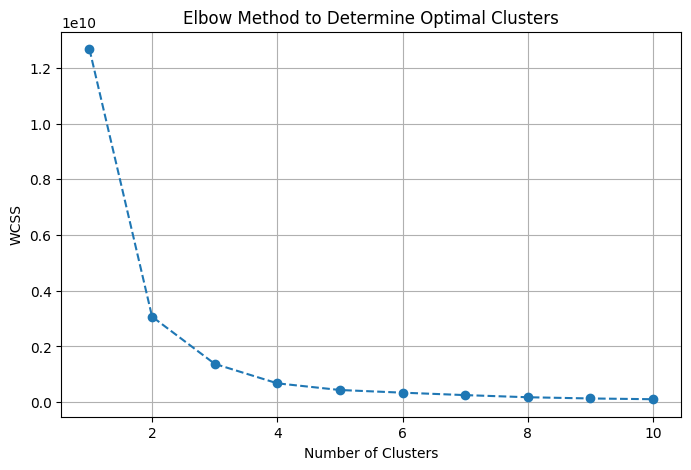

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


X = df[['Overtime', 'No. of Workers', 'Actual Productivity']]

wcss = []  

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**The optimal number of clusters are 3**

### Kmeans Clustering Visualization

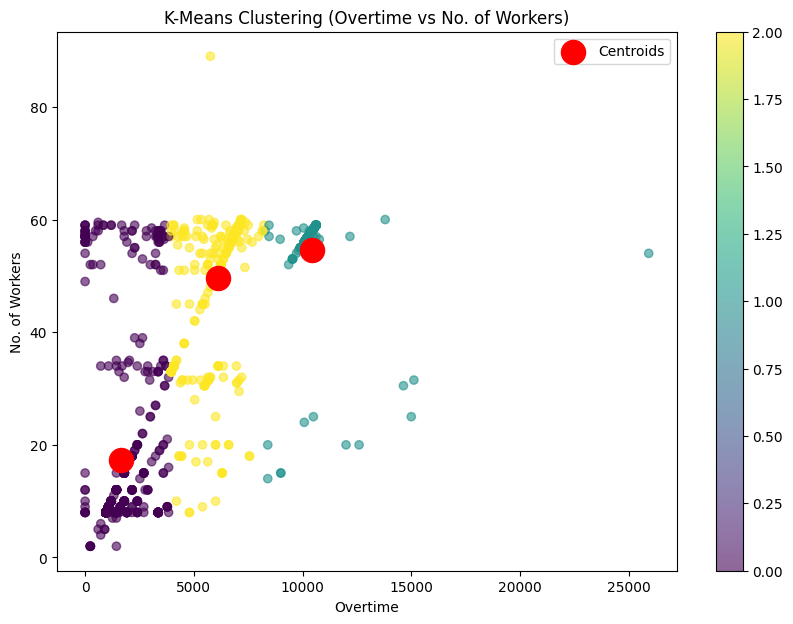

array([[1.63508741e+03, 1.73219107e+01, 7.44458608e-01],
       [1.04260645e+04, 5.45096774e+01, 7.25916118e-01],
       [6.13131603e+03, 4.95758621e+01, 7.20597675e-01]])

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)


fig, ax = plt.subplots(figsize=(10, 7))


scatter = ax.scatter(df['Overtime'], df['No. of Workers'], 
                     c=df['Cluster'], cmap='viridis', alpha=0.6)


centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')


ax.set_title('K-Means Clustering (Overtime vs No. of Workers)')
ax.set_xlabel('Overtime')
ax.set_ylabel('No. of Workers')
ax.legend()
plt.colorbar(scatter)
plt.show()


centroids


# 5. Budget Allocation Strategy

# (i)

In [ ]:
total_budget = 8.4 * 100000  
unique_departments = df['Department'].nunique()
spend_per_department = total_budget / unique_departments

# Calculate Department Value
df['Department Spend'] = spend_per_department
df['Department Value'] = df['Actual Productivity'] / df['Department Spend']

# Aggregate value by department
dept_values = df.groupby('Department')['Department Value'].mean().reset_index()

In [ ]:
dept_values

,Department,Department Value
0,Finishing,0.000002
1,Sewing,0.000002


# (ii)

## Evaluate Current Spending:

Given that the Department Values are very low, a reevaluation of the entire spending strategy might be necessary. The low values suggest that the current budget allocation is not translating into significant productivity gains.
Revised Strategy:

Increase Efficiency: Instead of reallocating budget between departments, consider strategies to improve the efficiency and productivity of both departments. This could involve process improvements, better resource management, or additional training.
Alternative Investments: Evaluate alternative investments or projects that might yield higher productivity improvements. You might need to consider other areas of the organization where budget allocation could have a more significant impact.
Measure Other Metrics: Consider measuring other performance metrics that might give better insights into productivity and efficiency.